<a href="https://colab.research.google.com/github/samar-ash/NLP/blob/main/Copy_of_Copy_of_NLTK_MC_FA_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import 

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
!pip install wordcloud
from nltk import word_tokenize,sent_tokenize
import string

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Extract the 5 most recent inaugural speeches from the inaugural corpus.

In [ ]:
l=inaugural.fileids()[-5:]
l

['2005-Bush.txt',
 '2009-Obama.txt',
 '2013-Obama.txt',
 '2017-Trump.txt',
 '2021-Biden.txt']

In [ ]:
inaugural_raw = inaugural.raw(l)
inaugural_raw

'Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, members of the United States Congress, reverend clergy, distinguished guests, fellow citizens:\n  On this day, prescribed by law and marked by ceremony, we celebrate the durable wisdom of our Constitution, and recall the deep commitments that unite our country. I am grateful for the honor of this hour, mindful of the consequential times in which we live, and determined to fulfill the oath that I have sworn and you have witnessed.\n  At this second gathering, our duties are defined not by the words I use, but by the history we have seen together. For a half a century, America defended our own freedom by standing watch on distant borders. After the shipwreck of communism came years of relative quiet, years of repose, years of sabbatical¡Xand then there came a day of fire.\n  We have seen our vulnerability¡Xand we have seen its deepest source. For as long as whole regions of the world simmer in

# Remove stopwords, punctuations and whitespaces

In [ ]:
# create a fuction to remove stopwords and punctuations and whitespaces from words and return the remaining words
import nltk
# from nltk.corpus import stopwords
import string
nltk.download('punkt')
# nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
def filter_words(x):
  # stop_words=stopwords.words('english')
  # stop_words=set(stop_words)
  stop_words=set(STOPWORDS)
  more_stopwords=set(list(string.punctuation)+list(string.whitespace)+['\\n', '\\' ,'\\n\\n'])
  stop_words = set(stop_words.union(more_stopwords))
  word_tokens = word_tokenize(x)
  clean_word_data = [w for w in word_tokens if w.lower() not in stop_words]
  return clean_word_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

clean_word_data=filter_words(inaugural_raw)
clean_word_data


['Vice',
 'President',
 'Cheney',
 'Mr.',
 'Chief',
 'Justice',
 'President',
 'Carter',
 'President',
 'Bush',
 'President',
 'Clinton',
 'members',
 'United',
 'States',
 'Congress',
 'reverend',
 'clergy',
 'distinguished',
 'guests',
 'fellow',
 'citizens',
 'day',
 'prescribed',
 'law',
 'marked',
 'ceremony',
 'celebrate',
 'durable',
 'wisdom',
 'Constitution',
 'recall',
 'deep',
 'commitments',
 'unite',
 'country',
 'grateful',
 'honor',
 'hour',
 'mindful',
 'consequential',
 'times',
 'live',
 'determined',
 'fulfill',
 'oath',
 'sworn',
 'witnessed',
 'second',
 'gathering',
 'duties',
 'defined',
 'words',
 'use',
 'history',
 'seen',
 'together',
 'half',
 'century',
 'America',
 'defended',
 'freedom',
 'standing',
 'watch',
 'distant',
 'borders',
 'shipwreck',
 'communism',
 'came',
 'years',
 'relative',
 'quiet',
 'years',
 'repose',
 'years',
 'sabbatical¡Xand',
 'came',
 'day',
 'fire',
 'seen',
 'vulnerability¡Xand',
 'seen',
 'deepest',
 'source',
 'long',
 'who

# Create dataframe for the 5 most recent inaugural speeches

In [ ]:
# create a function to create a dataframes
def create_dataframe(l):
  import pandas as pd
  import re
  text_list=[]
  for text in l:
    t=re.sub(r'([\n\n]|_)+', ' ', inaugural.raw(text))
    text_list.append(t)
  my_df  = pd.DataFrame(text_list)
  my_df.columns = ['sentence']
  return my_df


In [ ]:
my_df=create_dataframe(l)
my_df

,sentence
0,"Vice President Cheney, Mr. Chief Justice, Pres..."
1,My fellow citizens: I stand here today humbled...
2,Thank you. Thank you so much. Vice President B...
3,"Chief Justice Roberts, President Carter, Presi..."
4,"Chief Justice Roberts, Vice President Harris, ..."


# Create a third column with the number of tokens in each speech

In [ ]:
# Create a third column with the number of tokens in each speech
my_df['number_of_tokens'] = my_df['sentence'].apply(lambda x : len(word_tokenize(str(x))))
my_df

,sentence,number_of_tokens
0,"Vice President Cheney, Mr. Chief Justice, Pres...",2307
1,My fellow citizens: I stand here today humbled...,2700
2,Thank you. Thank you so much. Vice President B...,2317
3,"Chief Justice Roberts, President Carter, Presi...",1679
4,"Chief Justice Roberts, Vice President Harris, ...",3027


# Create a fourth column with the number of sentences in each speech

In [ ]:
my_df['number_of_sentences'] = my_df['sentence'].apply(lambda x : len(sent_tokenize(str(x))))
my_df

,sentence,number_of_tokens,number_of_sentences
0,"Vice President Cheney, Mr. Chief Justice, Pres...",2307,95
1,My fellow citizens: I stand here today humbled...,2700,110
2,Thank you. Thank you so much. Vice President B...,2317,90
3,"Chief Justice Roberts, President Carter, Presi...",1679,90
4,"Chief Justice Roberts, Vice President Harris, ...",3027,166


# Create a function for the most occurring word in a given text(stopwords are removed inside function)

In [ ]:
from collections import Counter
def most_common_word(x):
  
  x_filtered=filter_words(x)
  corpus_tokenized=[]
  for word in x_filtered:
    corpus_tokenized.append(word.lower())
  return Counter(corpus_tokenized).most_common(1)[0][0]
  

# Create a fifth column with the most occurring word in each speech

In [ ]:
my_df['most_common_word'] = my_df['sentence'].apply(lambda x : (most_common_word(str(x))))
my_df

,sentence,number_of_tokens,number_of_sentences,most_common_word
0,"Vice President Cheney, Mr. Chief Justice, Pres...",2307,95,freedom
1,My fellow citizens: I stand here today humbled...,2700,110,us
2,Thank you. Thank you so much. Vice President B...,2317,90,us
3,"Chief Justice Roberts, President Carter, Presi...",1679,90,will
4,"Chief Justice Roberts, Vice President Harris, ...",3027,166,will


# Create a function to find sentences starting from beginning year and ending in ending year

In [ ]:
# create a function to find sentences starting from beginning year and ending in ending year
def find_sentences_n_m(n,m):
  import re
  sentences_lists=inaugural.fileids()
  for i in range(len(sentences_lists)):
    words=word_tokenize(re.sub(r'(-)', ' ', sentences_lists[i]))
    if (words[0]==n):
      index_n=i
    elif (words[0]==m):
      index_m=i
  l=inaugural.fileids()[index_n:index_m+1]
  return l



#Extend this to n,m inaugural speeches, given that n is beginning year and m is the ending year

In [ ]:
# Extract the inaugural speeches between n,m
sentences_n_m=find_sentences_n_m("1825","1841")
inaugural_raw_between_n_m = inaugural.raw(sentences_n_m)
# Remove stopwords, punctuations and whitespaces from them
filtered_words=filter_words(inaugural_raw_between_n_m)
# Create dataframe between the n and m inaugural speeches
my_df=create_dataframe(sentences_n_m)
# Create a third column with the number of tokens in each speech
my_df['number_of_tokens'] = my_df['sentence'].apply(lambda x : len(word_tokenize(str(x))))
# Create a fourth column with the number of sentences in each speech
my_df['number_of_sentences'] = my_df['sentence'].apply(lambda x : len(sent_tokenize(str(x))))
# Create a fourth column with the number of sentences in each speech
my_df['most_common_word'] = my_df['sentence'].apply(lambda x : (most_common_word(str(x))))
my_df


,sentence,number_of_tokens,number_of_sentences,most_common_word
0,In compliance with an usage coeval with the ex...,3148,74,union
1,"Fellow citizens, about to undertake the arduou...",1208,25,will
2,"Fellow citizens, the will of the American peop...",1267,29,government
3,Fellow citizens: The practice of all my predec...,4160,95,people
4,Called from a retirement which I had supposed ...,9124,210,power


# Create a function to create word cloud for a given string

In [ ]:
!pip install wordcloud
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# create a function to create and plot wordcloud
def create_word_cloud(l):
  wordcloud = WordCloud(background_color = 'white',width=1000, height=1000, max_words=500, stopwords = STOPWORDS).generate(l)
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#  Create a word cloud for each 5 recent speech 

Sentence 1


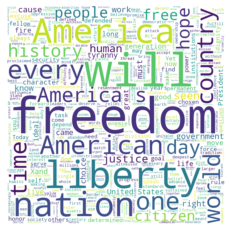

Sentence 2


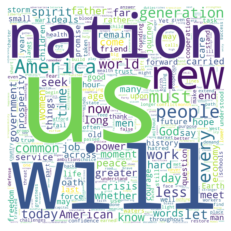

Sentence 3


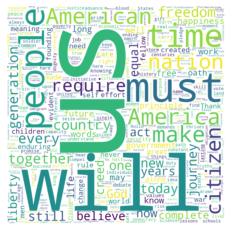

Sentence 4


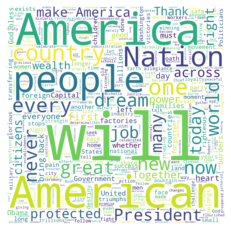

Sentence 5


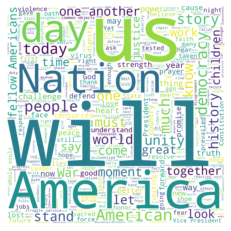

In [ ]:
i=0
for text in l:
  i+=1
  print("Sentence" ,i)
  create_word_cloud(inaugural.raw(text))

# Create a word cloud for all five most recent speeches combined.

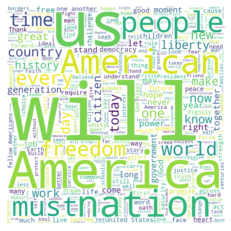

In [ ]:
create_word_cloud(inaugural_raw)

# Repeat steps 2-8 above for the first five inaugural speeches

In [ ]:
# Extract the first 5 speeches
l_first=inaugural.fileids()[0:5]
l_first_raw = inaugural.raw(l_first)
# Remove whitespaces and punctuation and stopwords
filtered_words=filter_words(l_first_raw)
# Create dataframe for the first 5 inaugural speeches
my_df_first_rows=create_dataframe(l_first)
# Create a third column with the number of tokens in each speech
my_df_first_rows['number_of_tokens'] = my_df_first_rows['sentence'].apply(lambda x : len(word_tokenize(str(x))))
# Create a fourth column with the number of sentences in each speech
my_df_first_rows['number_of_sentences'] = my_df_first_rows['sentence'].apply(lambda x : len(sent_tokenize(str(x))))
# Create a fifth column with the most occurring word in each speech
my_df_first_rows['most_common_word'] = my_df_first_rows['sentence'].apply(lambda x : (most_common_word(str(x))))
my_df_first_rows



,sentence,number_of_tokens,number_of_sentences,most_common_word
0,Fellow-Citizens of the Senate and of the House...,1537,23,will
1,"Fellow citizens, I am again called upon by the...",147,4,oath
2,"When it was first perceived, in early times, t...",2578,37,people
3,Friends and Fellow Citizens: Called upon to un...,1925,41,will
4,"Proceeding, fellow citizens, to that qualifica...",2382,45,public


Sentence 1


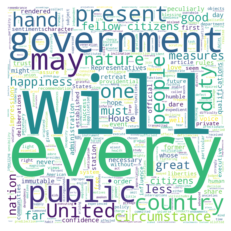

Sentence 2


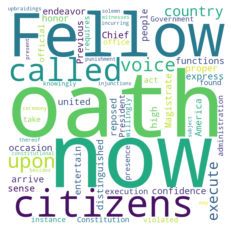

Sentence 3


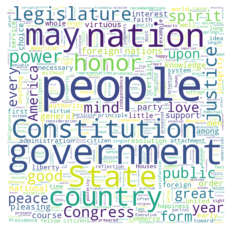

Sentence 4


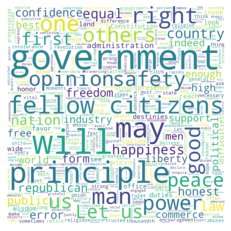

Sentence 5


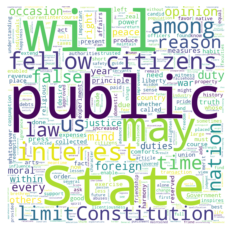

Wordcloud for all 5 first sentences combined


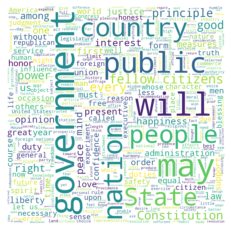

In [ ]:
# Create a word cloud for each 5 first speech 
i=0
for text in l_first:
  i+=1
  print("Sentence",i)
  create_word_cloud(inaugural.raw(text))
# Create a word cloud for each speech and all first five speeches combined
print("Wordcloud for all 5 first sentences combined")
create_word_cloud(l_first_raw)